# Problem Statement

Study the impact of financial and social indicators on performance predictability and provide
recommendations to borrowers and lenders to increase their chances of successful funding and loan repayment in the P2P
lending market.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import category_encoders as ce
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\tejas\Downloads\prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Removing column which are not that much important for doing task.

In [5]:
df=df.drop(['ListingKey','ListingNumber','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments','LP_ServiceFees','ProsperRating (numeric)','ProsperRating (Alpha)','ListingCategory (numeric)','GroupKey','DateCreditPulled','FirstRecordedCreditLine','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment','InquiriesLast6Months','TotalInquiries','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit','TotalTrades','TradesNeverDelinquent (percentage)','TradesOpenedLast6Months','IncomeVerifiable','LoanKey','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','PercentFunded','MemberKey','LoanOriginationQuarter','LoanNumber','InvestmentFromFriendsAmount','InvestmentFromFriendsCount','LoanOriginationDate','ListingCreationDate','IncomeRange','PublicRecordsLast10Years','CurrentDelinquencies','CreditScoreRangeLower','EmploymentStatusDuration','Occupation','BorrowerState','ClosedDate'],axis=1)

In [6]:
#These are the 18 columns on which we will do our further analysis.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   LenderYield                113937 non-null  float64
 6   ProsperScore               84853 non-null   float64
 7   EmploymentStatus           111682 non-null  object 
 8   IsBorrowerHomeowner        113937 non-null  bool   
 9   CurrentlyInGroup           113937 non-null  bool   
 10  CreditScoreRangeUpper      113346 non-null  float64
 11  DebtToIncomeRatio          105383 non-null  float64
 12  StatedMonthlyIncome        113937 non-null  float64
 13  LoanCurrentDaysDelinquent  11

### LoanStatus content many classifications so we convert them into binary class.

In [7]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [8]:
# Loan status is converted into binary class with the help of LoanCurrentDaysDelinquent i.e if LoanCurrentDaysDelinquent is 
# greater than 180 means customer is defaulted and viceversa.

In [9]:
df["LoanStatus"] = df["LoanCurrentDaysDelinquent"] > 180
df["LoanStatus"] = df["LoanStatus"].replace({True: 0, False: 1})

In [10]:
df.LoanStatus.value_counts() # which means 15063 customers are defaulted customers.

1    98874
0    15063
Name: LoanStatus, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

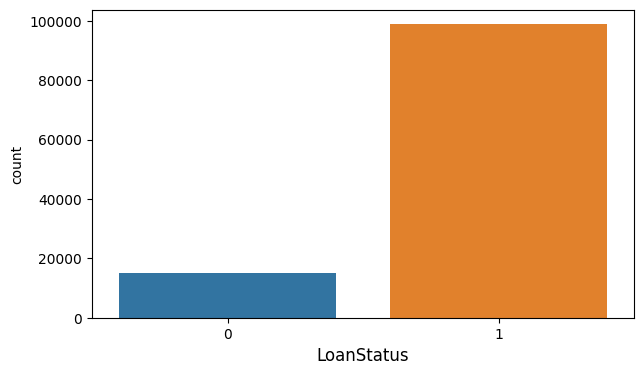

In [11]:
plt.figure(figsize=(7,4))
sns.countplot(x='LoanStatus',data=df)
plt.xlabel('LoanStatus',fontsize=12)
plt.show

### EXPLORATORY DATA ANALYSIS (EDA)

### 1) Filling Missing Values

In [12]:
df.isnull().sum()

CreditGrade                  84984
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperScore                 29084
EmploymentStatus              2255
IsBorrowerHomeowner              0
CurrentlyInGroup                 0
CreditScoreRangeUpper          591
DebtToIncomeRatio             8554
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
MonthlyLoanPayment               0
Recommendations                  0
Investors                        0
dtype: int64

In [13]:
# Now we will take mean of 'DebtToIncomeRatio ','CreditScoreRangeUpper','BorrowerAPR' and mode of EmploymentStatus'
# to fill missing values

In [14]:
df["BorrowerAPR"]=df["BorrowerAPR"].fillna(df["BorrowerAPR"].dropna().mean())
df["BorrowerAPR"].isnull().sum()

0

In [15]:
df["CreditScoreRangeUpper"]=df["CreditScoreRangeUpper"].fillna(df["CreditScoreRangeUpper"].dropna().mean())
df["CreditScoreRangeUpper"].isnull().sum()

0

In [16]:
df["DebtToIncomeRatio"]=df["DebtToIncomeRatio"].fillna(df["DebtToIncomeRatio"].dropna().mean())
df["DebtToIncomeRatio"].isnull().sum()

0

In [17]:
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])
df["EmploymentStatus"].isnull().sum()

0

In [18]:
df.isnull().sum()  #here we can't replace the missing values of creditgrade and prosperscore because that are the values after and before 2009.

CreditGrade                  84984
Term                             0
LoanStatus                       0
BorrowerAPR                      0
BorrowerRate                     0
LenderYield                      0
ProsperScore                 29084
EmploymentStatus                 0
IsBorrowerHomeowner              0
CurrentlyInGroup                 0
CreditScoreRangeUpper            0
DebtToIncomeRatio                0
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
MonthlyLoanPayment               0
Recommendations                  0
Investors                        0
dtype: int64

### 2) Data Visualization

C:\Users\tejas\AppData\Local\Temp\ipykernel_22364\1259344197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


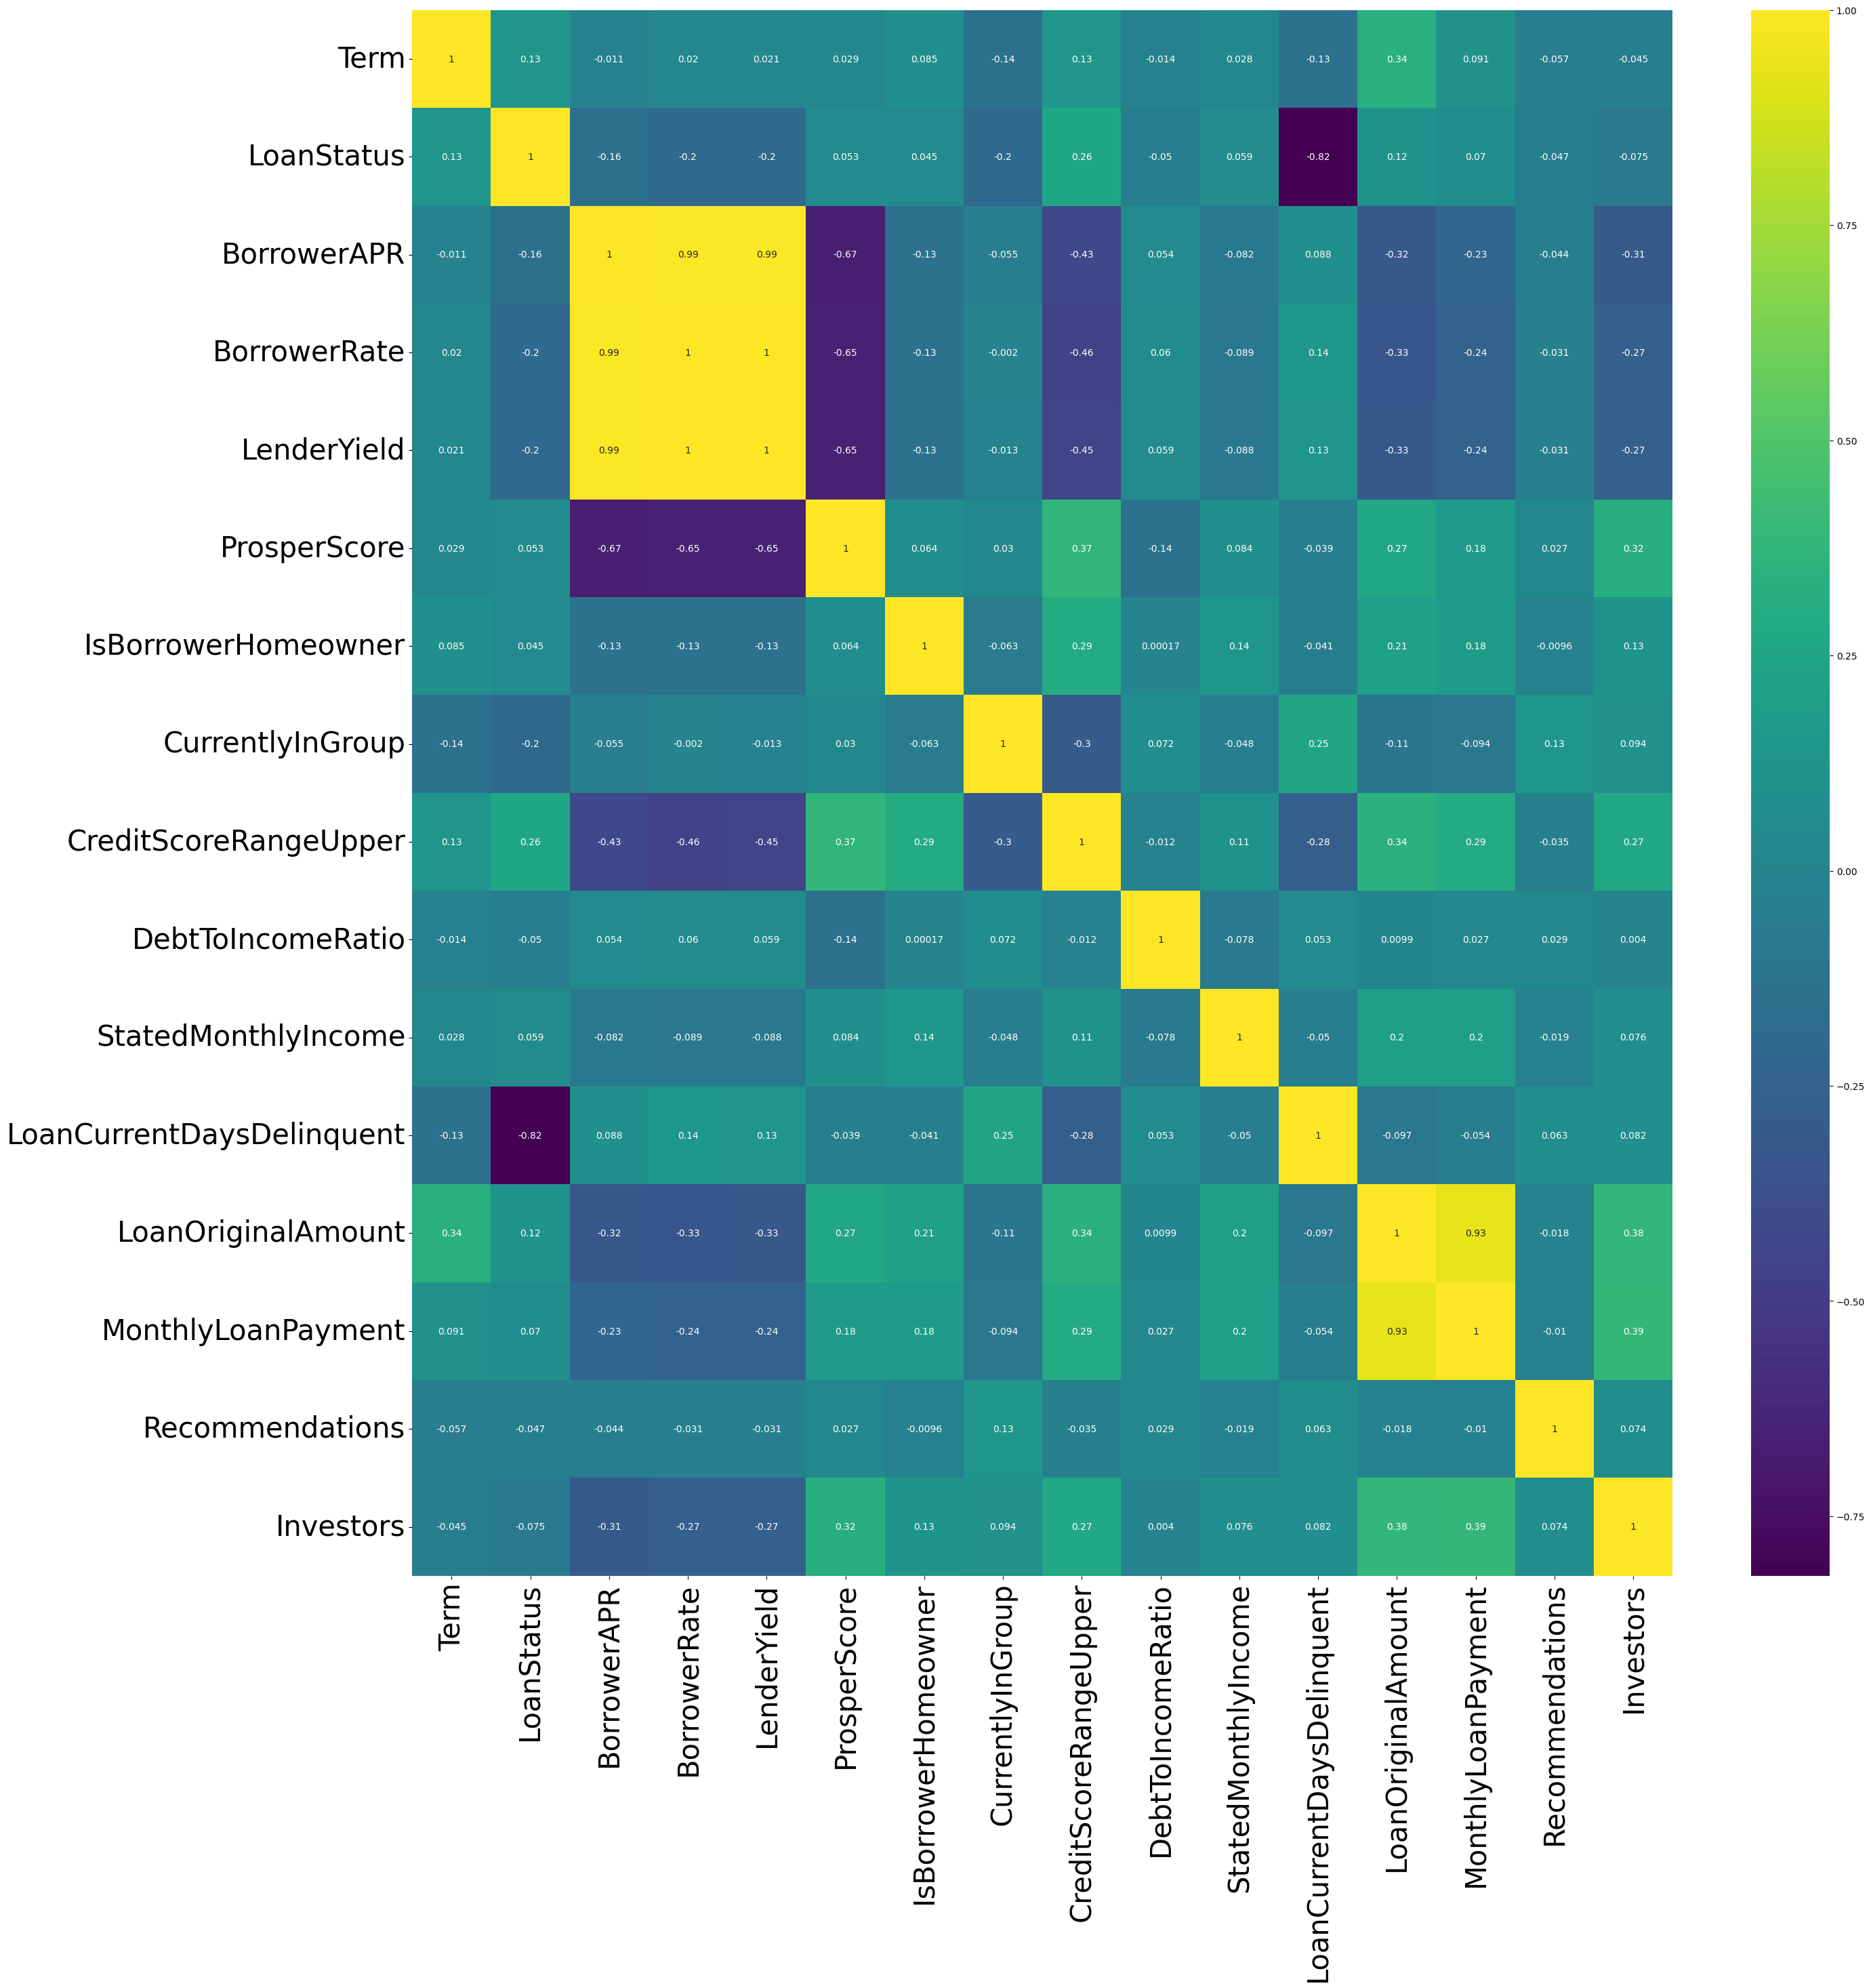

In [19]:
# Calculate correlation matrix
correlation = df.corr()
plt.figure(figsize=(30, 30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Plot correlation heatmap
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.show()

### A) Univeriate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

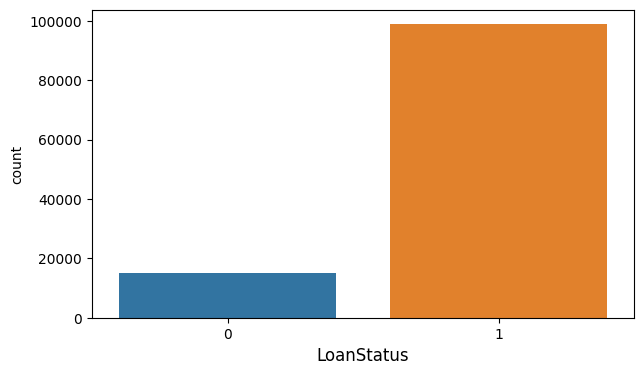

In [20]:
plt.figure(figsize=(7,4))
sns.countplot(x='LoanStatus',data=df)
plt.xlabel('LoanStatus',fontsize=12)
plt.show

#Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency? 
Answer-No it does not lead to higher amount of deliquency

<function matplotlib.pyplot.show(close=None, block=None)>

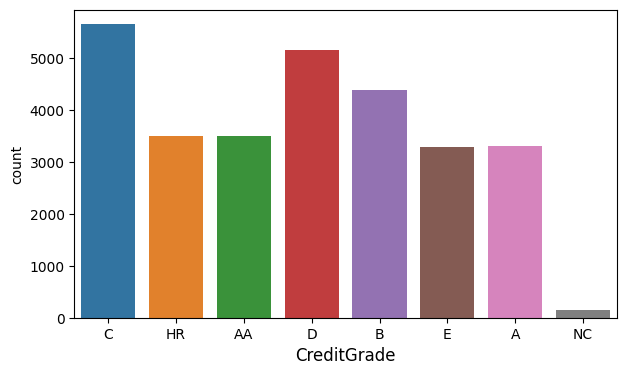

In [21]:
plt.figure(figsize=(7,4))
sns.countplot(x='CreditGrade',data=df)
plt.xlabel('CreditGrade',fontsize=12)
plt.show

#In above analysis we can see that the most number of borrowers Credit Grade are C and D.

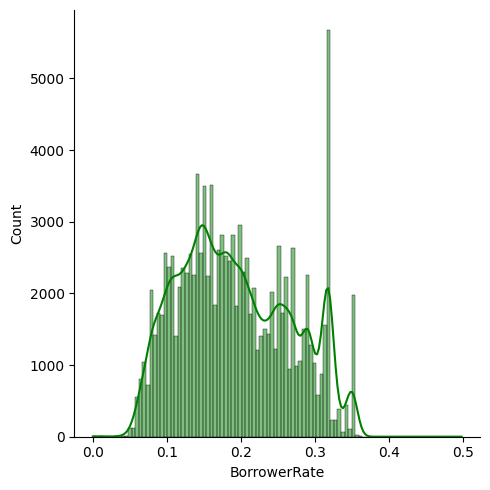

In [22]:
sns.displot(df['BorrowerRate'],color='green',kde=True)

<AxesSubplot: xlabel='BorrowerRate', ylabel='Count'>

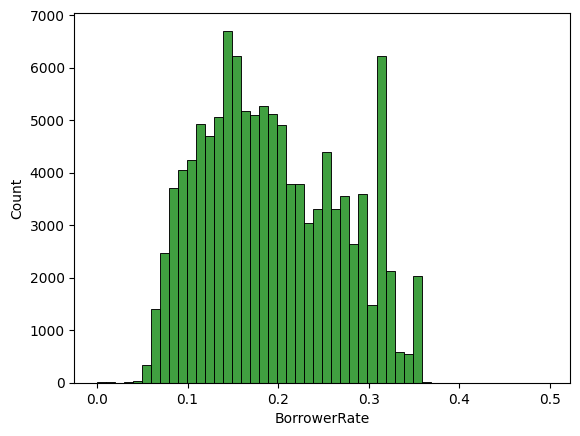

In [23]:
sns.histplot(df["BorrowerRate"],bins=50,color='green')

 #What is the highest number of BorrowerRate?
 Answer- 0.32 Is the highest number of borrower rate.

<AxesSubplot: xlabel='LenderYield', ylabel='Count'>

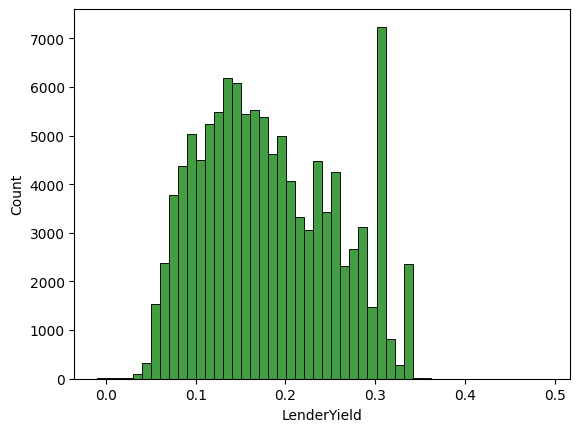

In [24]:
sns.histplot(df["LenderYield"],bins=50,color='green')

#Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?
Answer-Yes the highest number of Lender Yield is between 0.1 and 0.2.

### B) Bivariate Analysis

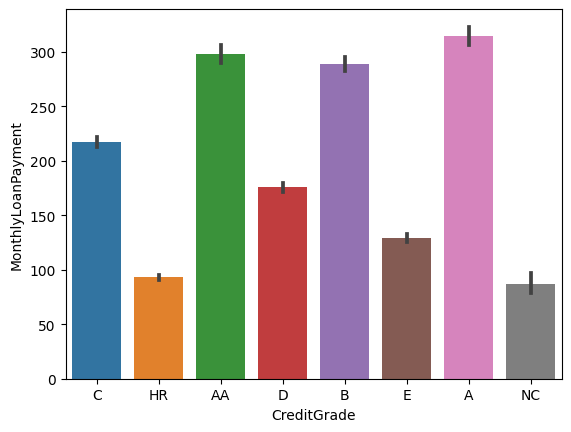

In [25]:
data=pd.DataFrame({'Numerical':df['MonthlyLoanPayment'],'Categorical':df['CreditGrade']})
sns.barplot(x='Categorical',y='Numerical',data=data)
plt.xlabel('CreditGrade')
plt.ylabel('MonthlyLoanPayment')
plt.show()

#Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B
Answer- From above barplot we can see that credit grade AA,A and B are the higher creditgrade and they are paying higher monthlyloanpayment which is nearly $300.

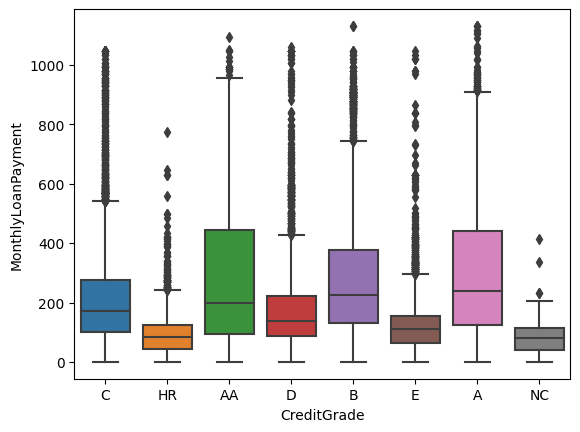

In [26]:
data=pd.DataFrame({'Numerical':df['MonthlyLoanPayment'],'Categorical':df['CreditGrade']})
sns.boxplot(x='Categorical',y='Numerical',data=data)
plt.xlabel('CreditGrade')
plt.ylabel('MonthlyLoanPayment')
plt.show()

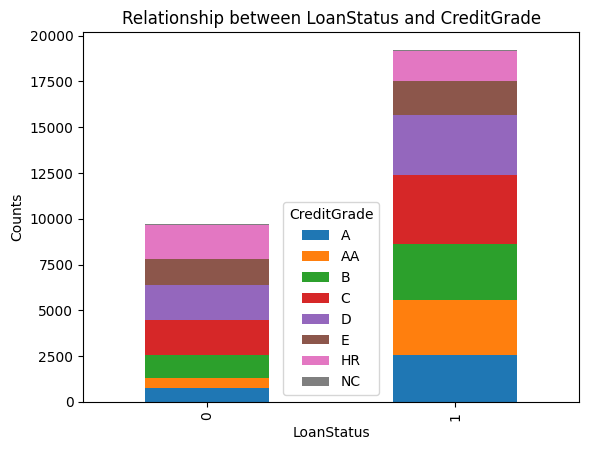

In [27]:
counts = df.groupby(['LoanStatus','CreditGrade']).size().unstack()

# Plotting the graph
counts.plot(kind='bar', stacked=True)

plt.xlabel('LoanStatus')
plt.ylabel('Counts')
plt.title('Relationship between LoanStatus and CreditGrade')
plt.show()

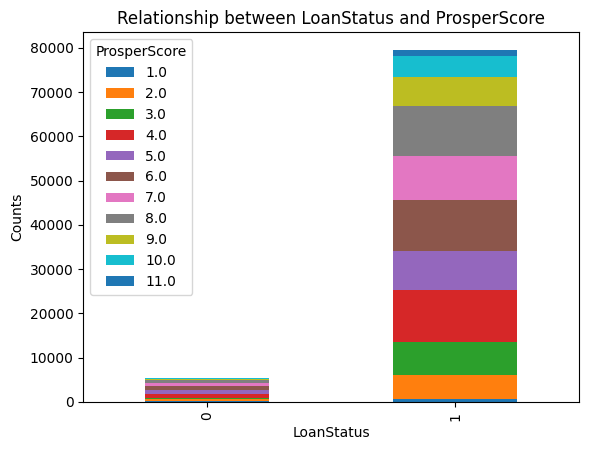

In [28]:
counts = df.groupby(['LoanStatus','ProsperScore']).size().unstack()

# Plotting the graph
counts.plot(kind='bar', stacked=True)

plt.xlabel('LoanStatus')
plt.ylabel('Counts')
plt.title('Relationship between LoanStatus and ProsperScore')
plt.show()

#Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.
In above plot we can see that for creditgrades A,AA,B,C,D the accuracy is good as they are more numbers than in defaulted case.and also we can see prosperscore is more accurate than creditgrade in above plot.

### C) Multivariate Analysis

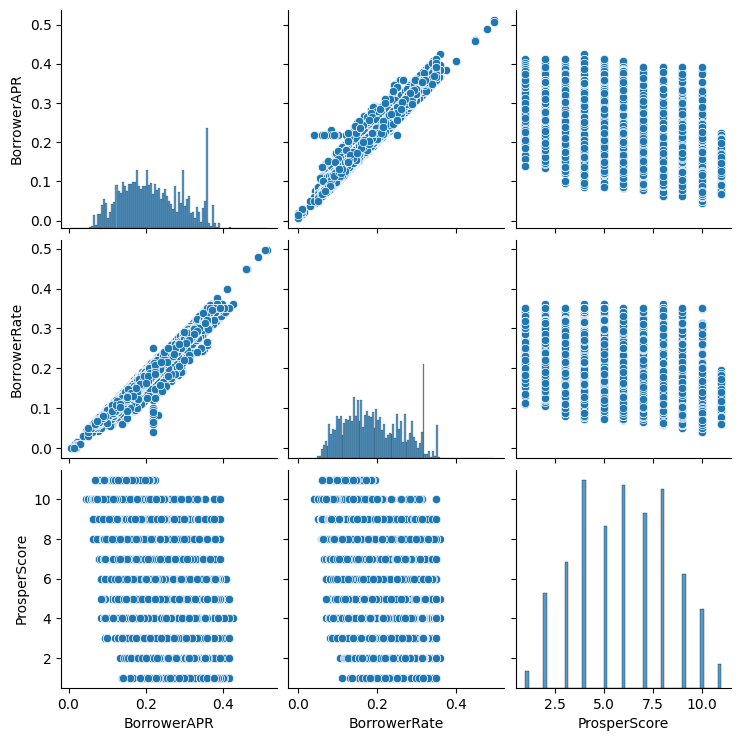

In [29]:
data=pd.DataFrame({'BorrowerAPR':df['BorrowerAPR'],'BorrowerRate':df['BorrowerRate'],'ProsperScore':df['ProsperScore']})
sns.pairplot(data)
plt.show()

From above multuvariate plot we can see that, higher ProsperScore has lower Borrower Rate and Borrower Annual Percentage Rate that means the Prosper Score is being used alongside the Credit Grade in determing a person’s creditworthiness.

### CONCLUSION

1)Higher ProsperScore has lower Borrower Rate and Borrower Annual Percentage Rate that means the Prosper Score is being used alongside the Credit Grade in determing a person’s creditworthiness.
2)prosperscore is more accurate than creditgrade bcoz defaulted case are less than in creditgrade and creditgrades A,AA,B,C,D has good accuracy as they are more in numbers than in defaulted case.
3)most number of borrowers Credit Grade are C and D.
4)low Credit Grade such as C and D does not lead to higher amount of deliquency.
5)highest number of Borrower Rate and Lender Yield is in between 0.1 and 0.2.
6)credit grade AA,A and B are the higher creditgrade and they are paying higher monthlyloanpayment which is nearly $300.

In [30]:
df.head(10)

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors
0,C,36,1,0.16516,0.1580,0.1380,NaN,Self-employed,True,True,659.0,0.17,3083.333333,0,9425,330.43,0,258
1,NaN,36,1,0.12016,0.0920,0.0820,7.0,Employed,False,False,699.0,0.18,6125.000000,0,10000,318.93,0,1
2,HR,36,1,0.28269,0.2750,0.2400,NaN,Not available,False,True,499.0,0.06,2083.333333,0,3001,123.32,0,41
3,NaN,36,1,0.12528,0.0974,0.0874,9.0,Employed,True,False,819.0,0.15,2875.000000,0,10000,321.45,0,158
4,NaN,36,1,0.24614,0.2085,0.1985,4.0,Employed,True,False,699.0,0.26,9583.333333,0,15000,563.97,0,20
5,NaN,60,1,0.15425,0.1314,0.1214,10.0,Employed,True,False,759.0,0.36,8333.333333,0,15000,342.37,0,1
6,NaN,36,1,0.31032,0.2712,0.2612,2.0,Employed,False,False,699.0,0.27,2083.333333,0,3000,122.67,0,1
7,NaN,36,1,0.23939,0.2019,0.1919,4.0,Employed,False,False,719.0,0.24,3355.750000,0,10000,372.60,0,1
8,NaN,36,1,0.07620,0.0629,0.0529,9.0,Employed,True,False,839.0,0.25,3333.333333,0,10000,305.54,0,1
9,NaN,36,1,0.07620,0.0629,0.0529,11.0,Employed,True,False,839.0,0.25,3333.333333,0,10000,305.54,0,1


In [31]:
df['CreditGrade'].fillna(0, inplace=True)
df['ProsperScore'].fillna(0, inplace=True)

In [32]:
df.head(10)

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors
0,C,36,1,0.16516,0.1580,0.1380,0.0,Self-employed,True,True,659.0,0.17,3083.333333,0,9425,330.43,0,258
1,0,36,1,0.12016,0.0920,0.0820,7.0,Employed,False,False,699.0,0.18,6125.000000,0,10000,318.93,0,1
2,HR,36,1,0.28269,0.2750,0.2400,0.0,Not available,False,True,499.0,0.06,2083.333333,0,3001,123.32,0,41
3,0,36,1,0.12528,0.0974,0.0874,9.0,Employed,True,False,819.0,0.15,2875.000000,0,10000,321.45,0,158
4,0,36,1,0.24614,0.2085,0.1985,4.0,Employed,True,False,699.0,0.26,9583.333333,0,15000,563.97,0,20
5,0,60,1,0.15425,0.1314,0.1214,10.0,Employed,True,False,759.0,0.36,8333.333333,0,15000,342.37,0,1
6,0,36,1,0.31032,0.2712,0.2612,2.0,Employed,False,False,699.0,0.27,2083.333333,0,3000,122.67,0,1
7,0,36,1,0.23939,0.2019,0.1919,4.0,Employed,False,False,719.0,0.24,3355.750000,0,10000,372.60,0,1
8,0,36,1,0.07620,0.0629,0.0529,9.0,Employed,True,False,839.0,0.25,3333.333333,0,10000,305.54,0,1
9,0,36,1,0.07620,0.0629,0.0529,11.0,Employed,True,False,839.0,0.25,3333.333333,0,10000,305.54,0,1


# Feature Engineering

In [33]:
X = df.copy()
y = X.pop("LoanStatus")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [34]:
df.isnull().sum()

CreditGrade                  0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
ProsperScore                 0
EmploymentStatus             0
IsBorrowerHomeowner          0
CurrentlyInGroup             0
CreditScoreRangeUpper        0
DebtToIncomeRatio            0
StatedMonthlyIncome          0
LoanCurrentDaysDelinquent    0
LoanOriginalAmount           0
MonthlyLoanPayment           0
Recommendations              0
Investors                    0
dtype: int64

In [35]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

LoanCurrentDaysDelinquent    0.389106
LenderYield                  0.076540
ProsperScore                 0.058790
Investors                    0.028587
Term                         0.013477
Recommendations              0.002177
Name: MI Scores, dtype: float64

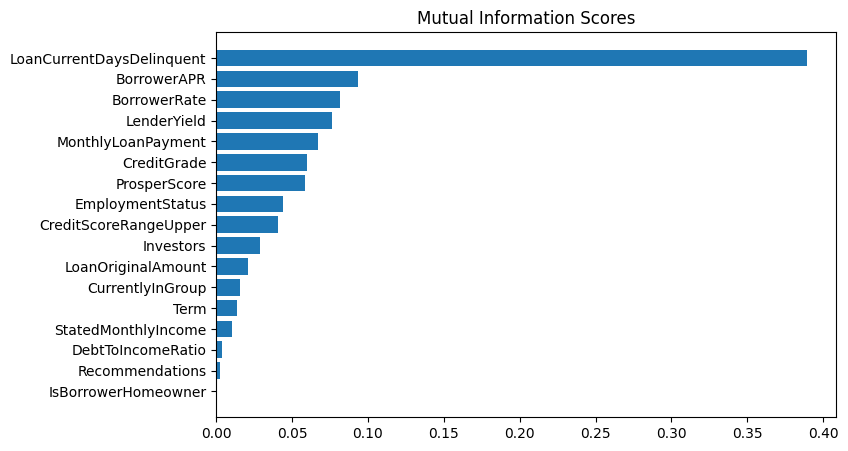

In [36]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In above graph we can see that LoanCurrentDaysDelinquent is having highest MI score which means that one is the most important feature in our dataset as we have it earliar also in EDA and other than that BorrowerAPR, BorrowerRate, LenderYield these are also IMP after LoanCurrentDaysDelinquent.

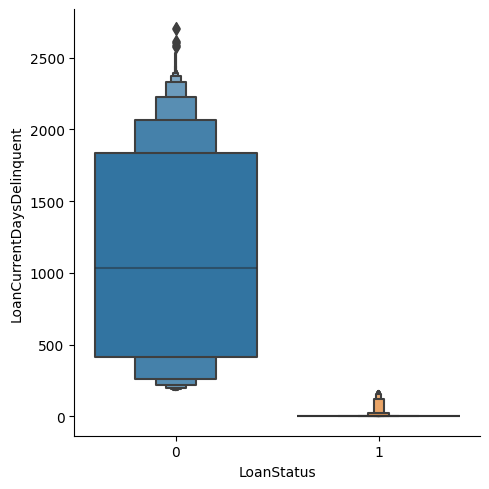

In [45]:
sns.catplot(x='LoanStatus',y='LoanCurrentDaysDelinquent',data=df,kind='boxen');

Here we can see that after around 180days  all are the customers are defaulted.

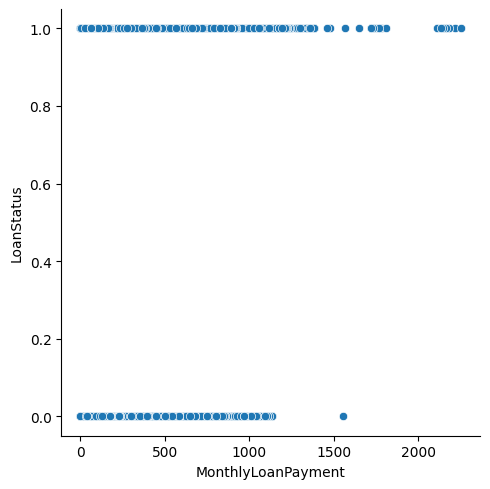

In [54]:
sns.relplot(x="MonthlyLoanPayment", y="LoanStatus", data=df);

# K-Means Clustering

In [80]:
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

X = df.loc[:, ["LoanStatus", "LoanCurrentDaysDelinquent", "BorrowerAPR"]]
X.head()

C:\Users\tejas\AppData\Local\Temp\ipykernel_22364\133413071.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,LoanStatus,LoanCurrentDaysDelinquent,BorrowerAPR
0,1,0,0.16516
1,1,0,0.12016
2,1,0,0.28269
3,1,0,0.12528
4,1,0,0.24614


In [81]:
kmeans = KMeans(n_clusters=4)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

C:\Users\tejas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,LoanStatus,LoanCurrentDaysDelinquent,BorrowerAPR,Cluster
0,1,0,0.16516,1
1,1,0,0.12016,1
2,1,0,0.28269,1
3,1,0,0.12528,1
4,1,0,0.24614,1


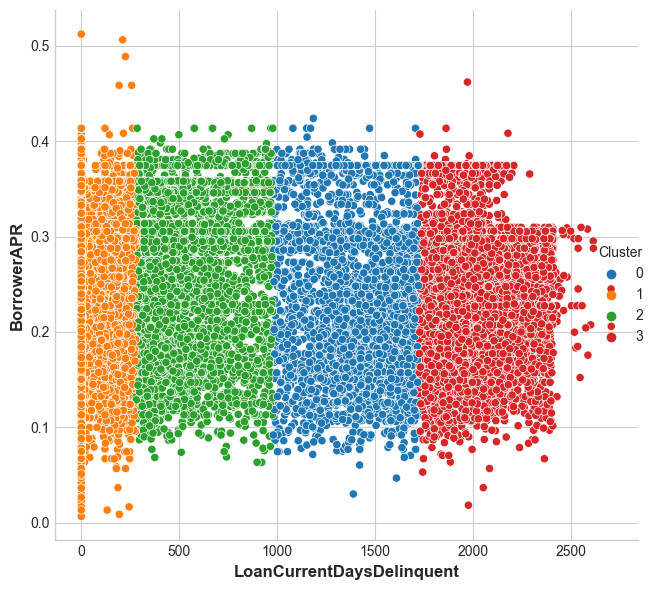

In [82]:
sns.relplot(
    x="LoanCurrentDaysDelinquent", y="BorrowerAPR", hue="Cluster", data=X, height=6,
);

here cluster 1 is having highest good customers.

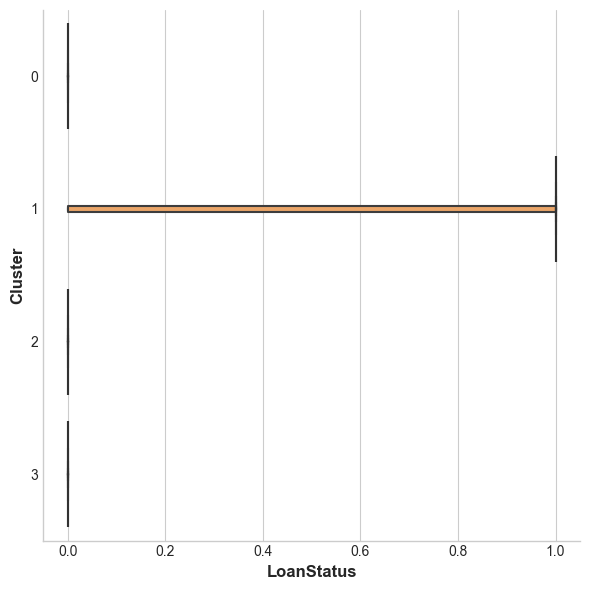

In [83]:
X["LoanStatus"] = df["LoanStatus"]
sns.catplot(x="LoanStatus", y="Cluster", data=X, kind="boxen", height=6);

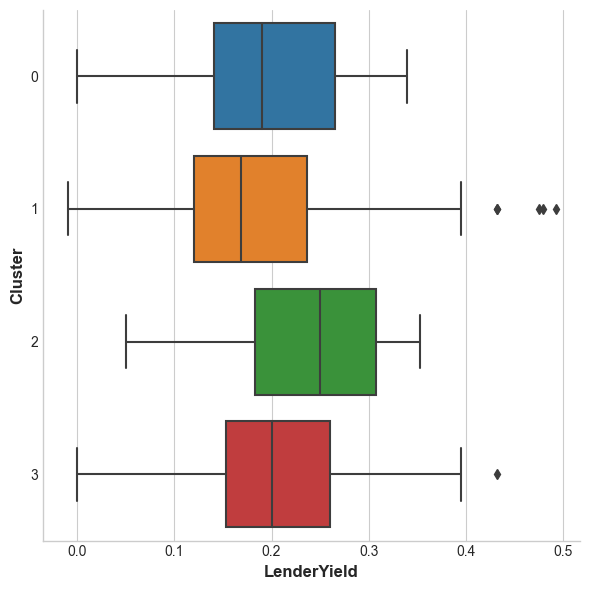

In [88]:
X["LenderYield"] = df["LenderYield"]
sns.catplot(x="LenderYield", y="Cluster", data=X, kind="box", height=6);

# Principal Component Analysis

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

C:\Users\tejas\AppData\Local\Temp\ipykernel_22364\2129153102.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [91]:
df.head()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors
0,C,36,1,0.16516,0.1580,0.1380,0.0,Self-employed,True,True,659.0,0.17,3083.333333,0,9425,330.43,0,258
1,0,36,1,0.12016,0.0920,0.0820,7.0,Employed,False,False,699.0,0.18,6125.000000,0,10000,318.93,0,1
2,HR,36,1,0.28269,0.2750,0.2400,0.0,Not available,False,True,499.0,0.06,2083.333333,0,3001,123.32,0,41
3,0,36,1,0.12528,0.0974,0.0874,9.0,Employed,True,False,819.0,0.15,2875.000000,0,10000,321.45,0,158
4,0,36,1,0.24614,0.2085,0.1985,4.0,Employed,True,False,699.0,0.26,9583.333333,0,15000,563.97,0,20


In [93]:
features = ["LoanCurrentDaysDelinquent", "BorrowerAPR", "LenderYield", "ProsperScore"]

X = df.copy()
y = X.pop('LoanStatus')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [94]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,-0.420816,0.878666,-1.326461,0.011139
1,-2.004985,0.040289,0.137588,0.065143
2,1.400476,0.084987,-1.074112,0.058968
3,-2.128376,-0.340141,0.600230,0.032421
4,0.326483,-0.320590,-0.260873,0.086336


In [95]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
LoanCurrentDaysDelinquent,0.223460,0.721993,0.654572,0.018077
BorrowerAPR,0.636064,-0.308178,0.103451,0.699819
LenderYield,0.650893,-0.250526,0.073813,-0.712830
ProsperScore,-0.349037,-0.566559,0.745242,-0.042421


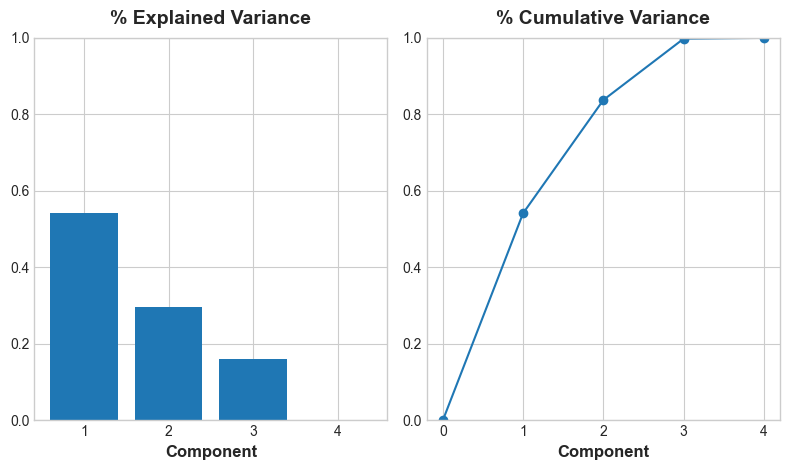

In [96]:
# Look at explained variance
plot_variance(pca);

In [97]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC3    0.242422
PC2    0.226938
PC1    0.193800
PC4    0.147372
Name: MI Scores, dtype: float64

In [101]:
# Show dataframe sorted by PC3
idx = X_pca["PC1"].sort_values(ascending=False).index
cols = ["LoanCurrentDaysDelinquent", "BorrowerAPR", "LenderYield", "ProsperScore"]
df.loc[idx, cols]

,LoanCurrentDaysDelinquent,BorrowerAPR,LenderYield,ProsperScore
22195,1970,0.46201,0.4325,0.0
36018,0,0.51229,0.4925,0.0
56761,211,0.50633,0.4800,0.0
82043,225,0.48873,0.4750,0.0
14160,2177,0.40831,0.3950,0.0
...,...,...,...,...
20358,0,0.05335,0.0400,10.0
54226,0,0.05436,0.0350,10.0
9517,0,0.04935,0.0300,10.0
106473,0,0.04935,0.0300,10.0


In [104]:
df.head()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors
0,C,36,1,0.16516,0.1580,0.1380,0.0,Self-employed,True,True,659.0,0.17,3083.333333,0,9425,330.43,0,258
1,0,36,1,0.12016,0.0920,0.0820,7.0,Employed,False,False,699.0,0.18,6125.000000,0,10000,318.93,0,1
2,HR,36,1,0.28269,0.2750,0.2400,0.0,Not available,False,True,499.0,0.06,2083.333333,0,3001,123.32,0,41
3,0,36,1,0.12528,0.0974,0.0874,9.0,Employed,True,False,819.0,0.15,2875.000000,0,10000,321.45,0,158
4,0,36,1,0.24614,0.2085,0.1985,4.0,Employed,True,False,699.0,0.26,9583.333333,0,15000,563.97,0,20
